In [1]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, Dropout

In [2]:
test_data = 'test'
train_data = 'train'

In [3]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

In [4]:
train_set = train_datagen.flow_from_directory(train_data,
                    target_size = (224,224),
                    batch_size = 32,
                    color_mode = 'rgb',
                    shuffle = True,
                    class_mode = 'categorical')

Found 14407 images belonging to 10 classes.


In [5]:
test_set = test_datagen.flow_from_directory(test_data,
                    target_size = (224,224),
                    batch_size = 32,
                    color_mode = 'rgb',
                    shuffle = True,
                    class_mode = 'categorical')

Found 3602 images belonging to 10 classes.


In [6]:
model = Sequential()


# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid', activation='relu' ))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid', activation='relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid',))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))


# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(units = 4096, activation='relu'))

# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(units = 4096, activation='relu'))

# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(units = 1000, activation='relu'))

# Add Dropout
#model.add(Dropout(0.4))

# Output Layer
model.add(Dense(units = 10, activation='softmax'))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 384)         1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 256)         8

In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [9]:
hist = model.fit(train_set, steps_per_epoch=200, epochs=10, validation_data=test_set, validation_steps=100)

Epoch 1/10
200/200 [==============================] - 25s 125ms/step - loss: 2.7356 - accuracy: 0.4187 - val_loss: 0.6679 - val_accuracy: 0.7622
Epoch 2/10
200/200 [==============================] - 22s 111ms/step - loss: 0.4548 - accuracy: 0.8680 - val_loss: 0.3617 - val_accuracy: 0.9066
Epoch 3/10
200/200 [==============================] - 20s 99ms/step - loss: 0.3133 - accuracy: 0.9158 - val_loss: 0.1867 - val_accuracy: 0.9481
Epoch 4/10
200/200 [==============================] - 19s 97ms/step - loss: 0.2273 - accuracy: 0.9377 - val_loss: 0.2028 - val_accuracy: 0.9534
Epoch 5/10
200/200 [==============================] - 20s 98ms/step - loss: 0.2100 - accuracy: 0.9472 - val_loss: 0.2676 - val_accuracy: 0.9425
Epoch 6/10
200/200 [==============================] - 19s 97ms/step - loss: 0.2007 - accuracy: 0.9488 - val_loss: 0.1478 - val_accuracy: 0.9694
Epoch 7/10
200/200 [==============================] - 19s 97ms/step - loss: 0.2254 - accuracy: 0.9501 - val_loss: 0.3597 - val_accurac

In [10]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


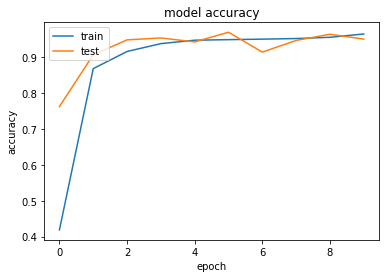

In [11]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

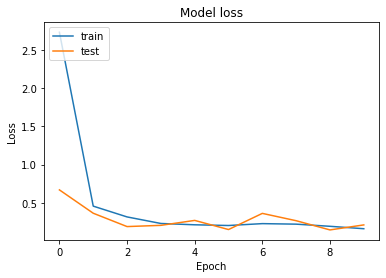

In [12]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [13]:
img = keras.preprocessing.image.load_img("30213.jpg",color_mode = 'rgb', target_size=(224,224,3))  ##image for 3

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)                   # Create batch axis

predictions = model.predict(img_array)
score1 = predictions[0]
print(score1)

[8.52335803e-03 3.19699990e-04 1.08162193e-02 7.10058391e-01
 1.92910340e-03 2.41352827e-03 1.12805836e-01 1.38079733e-01
 1.92215550e-03 1.31320031e-02]


In [14]:
print(score1)                ### probability = 1 for 3

[8.52335803e-03 3.19699990e-04 1.08162193e-02 7.10058391e-01
 1.92910340e-03 2.41352827e-03 1.12805836e-01 1.38079733e-01
 1.92215550e-03 1.31320031e-02]


In [15]:
img = keras.preprocessing.image.load_img("70405.jpg", color_mode = 'rgb', target_size=(224,224,3))  ##image for 7

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)                   # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(score)                                                     ###0.98 prob for 7

[3.0141655e-05 2.9748418e-07 7.8368839e-06 7.6697161e-06 2.2476021e-07
 1.5890141e-07 3.0573430e-03 9.9688798e-01 1.0924873e-07 8.1601429e-06]
